In [1]:
from PostNetwork import *
import networkx as nx
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
clean_dir = "clean_data\\"

In [3]:
dataframe = create_dataframe()
DG_c = dataframe_to_graph(dataframe,typ='comment')

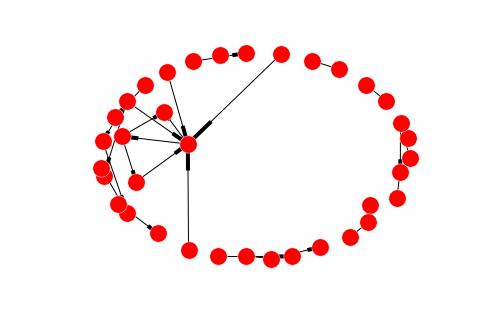

In [4]:
nx.draw(DG_c)

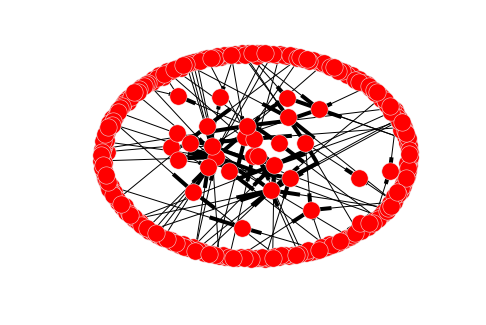

In [5]:
DG_t = dataframe_to_graph(dataframe,typ='commentthread')
nx.draw(DG_t)

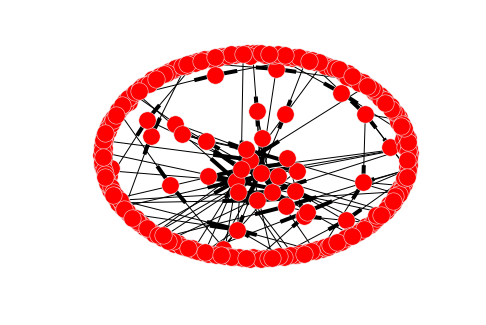

In [6]:
DG_m = dataframe_to_graph(dataframe,typ='mixture')
nx.draw(DG_m)

In [7]:
len(DG_c.edges(data=True))

30

In [8]:
len(DG_t.edges(data=True))

240

In [9]:
len(DG_m.edges(data=True))

268

In [10]:
with open(clean_dir+'author_index.p','rb') as f:
    author_index = pickle.load(f)

In [12]:
ind_to_authorid = {author_index[x]:x for x in author_index}
ind_to_authorid

{0: '5253196',
 1: '6734413',
 2: '9491390',
 3: '10598929',
 4: '956558',
 5: '4867149',
 6: '9946842',
 7: '7788686',
 8: '3393269',
 9: '10347782',
 10: '8547117',
 11: '10032304',
 12: '10556040',
 13: '1924965',
 14: '7613629',
 15: '9585301',
 16: '9951165',
 17: '9550371',
 18: '6684067',
 19: '10729475',
 20: '370696',
 21: '7369411',
 22: '9745908',
 23: '10730500',
 24: '9053700',
 25: '6825266',
 26: '6320785',
 27: '6822901',
 28: '10557364',
 29: '6913350',
 30: '10560736',
 31: '7045794',
 32: '8264154',
 33: '5573984',
 34: '3287534',
 35: '9231415',
 36: '10255917',
 37: '9671072',
 38: '7220900',
 39: '1541320',
 40: '2338896',
 41: '3287112',
 42: '10754667',
 43: '7417834',
 44: '315774',
 45: '229295',
 46: '10579670',
 47: '8616983',
 48: '10166447',
 49: '9918218',
 50: '5885955',
 51: '5547755',
 52: '9292111',
 53: '8633484',
 54: '1845276',
 55: '5222367',
 56: '9731667',
 57: '6885414',
 58: '10236608',
 59: '2343055',
 60: '9755032',
 61: '6056096',
 62: '104

In [13]:
max_comments = max(DG_c.in_degree().values())
max_author = DG_c.in_degree().values().index(max_comments)
print max_comments
print max_author

5
35


In [14]:
df = dataframe
print df.columns
df[df['author_id']==ind_to_authorid[35]][['author_username','_type','body','child_count','closed',
                                          'comment_count','comment_thread_id','created_at','depth',
                                          'endorsed','parent_id','pinned',
                                          'thread_type','title','votes']]

Index([u'_id', u'_type', u'abuse_flaggers', u'anonymous',
       u'anonymous_to_peers', u'at_position_list', u'author_id',
       u'author_username', u'body', u'child_count', u'closed',
       u'comment_count', u'comment_thread_id', u'commentable_id', u'context',
       u'course_id', u'created_at', u'depth', u'endorsed', u'endorsement',
       u'historical_abuse_flaggers', u'last_activity_at', u'parent_id',
       u'parent_ids', u'pinned', u'sk', u'thread_type', u'title',
       u'updated_at', u'visible', u'votes'],
      dtype='object')


,author_username,_type,body,child_count,closed,comment_count,comment_thread_id,created_at,depth,endorsed,parent_id,pinned,thread_type,title,votes
107,jdutka69,Comment,I had been using panel retail data provided by...,0,NaN,NaN,5703bbc010e0fd0521000a1f,2016-04-21 09:43:28.272,0,False,NaN,NaN,NaN,NaN,"{u'count': 0, u'point': 0, u'down_count': 0, u..."
1771,jdutka69,CommentThread,"In my opinion, visualisation is the best way t...",NaN,False,0,NaN,2016-04-12 12:05:40.613,NaN,NaN,NaN,NaN,discussion,Why to plot the data,"{u'count': 0, u'point': 0, u'down_count': 0, u..."


It is really strange...there should be 5 comments whose parent_id is associated with the comment author 35 posted, but instead her child_count is 0.

In [15]:
max_comments = max(DG_t.in_degree().values())
max_author = DG_t.in_degree().values().index(max_comments)
print max_comments
print max_author

12
14


In [16]:
df[df['author_id']==ind_to_authorid[14]][['author_username','_type','body','child_count','closed',
                                          'comment_count','comment_thread_id','created_at','depth',
                                          'endorsed','parent_id','pinned',
                                          'thread_type','title','votes']]

,author_username,_type,body,child_count,closed,comment_count,comment_thread_id,created_at,depth,endorsed,parent_id,pinned,thread_type,title,votes
2955,JanaStavjanova,CommentThread,"Hi all,\nMy name is Jana, I am from the Czech ...",NaN,False,12,NaN,2016-03-07 10:06:38.630,NaN,NaN,NaN,NaN,discussion,How you would measure the success of an online...,"{u'count': 2, u'point': 2, u'down_count': 0, u..."


This one makes sense.

In [17]:
max_comments = max(DG_m.in_degree().values())
max_author = DG_m.in_degree().values().index(max_comments)
print max_comments
print max_author

12
14


In [18]:
max_comments = max(DG_c.out_degree().values())
max_author = DG_c.out_degree().values().index(max_comments)
print max_comments
print max_author

3
23


In [19]:
df[df['author_id']==ind_to_authorid[23]][['author_username','_type','body','child_count','closed',
                                          'comment_count','comment_thread_id','created_at','depth',
                                          'endorsed','parent_id','pinned',
                                          'thread_type','title','votes']]

,author_username,_type,body,child_count,closed,comment_count,comment_thread_id,created_at,depth,endorsed,parent_id,pinned,thread_type,title,votes
54,AlexandraGurnet,Comment,I think that to measure the succes of an onlin...,0,NaN,NaN,57475e39f012b7056300035a,2016-05-27 01:32:10.814,0,False,NaN,NaN,NaN,NaN,"{u'count': 0, u'point': 0, u'down_count': 0, u..."


In [20]:
max_comments = max(DG_t.out_degree().values())
max_author = DG_t.out_degree().values().index(max_comments)
print max_comments
print max_author

11
255


In [21]:
df[df['author_id']==ind_to_authorid[255]][['author_username','_type','body','child_count','closed',
                                          'comment_count','comment_thread_id','created_at','depth',
                                          'endorsed','parent_id','pinned',
                                          'thread_type','title','votes']]

,author_username,_type,body,child_count,closed,comment_count,comment_thread_id,created_at,depth,endorsed,parent_id,pinned,thread_type,title,votes
123,marinazi,Comment,"Hi Harish,\n\nIf you paid for a verified certi...",0,NaN,NaN,5708465f209a6505480000f2,2016-04-13 16:30:08.889,1,False,57094930209a650557000181,NaN,NaN,NaN,"{u'count': 0, u'point': 0, u'down_count': 0, u..."
124,marinazi,Comment,"Dear Nicolas,\nThanks so much for your feedbac...",0,NaN,NaN,5708465f209a6505480000f2,2016-04-13 16:28:03.047,1,False,570b96a1209a65052400024a,NaN,NaN,NaN,"{u'count': 0, u'point': 0, u'down_count': 0, u..."
139,marinazi,Comment,Please see the following post and let us know ...,1,NaN,NaN,570249af81e07b053b000954,2016-04-09 00:02:37.826,0,False,NaN,NaN,NaN,NaN,"{u'count': 0, u'point': 0, u'down_count': 0, u..."
140,marinazi,Comment,"Hi All,\n\nHonor code certificates are no long...",1,NaN,NaN,56efe80881e07b0535000192,2016-04-08 23:59:11.522,0,False,NaN,NaN,NaN,NaN,"{u'count': 0, u'point': 0, u'down_count': 0, u..."
141,marinazi,Comment,"Hi Paul, the course is self-paced, the deadlin...",0,NaN,NaN,56f494adc3bac70511000377,2016-04-08 23:57:47.575,0,False,NaN,NaN,NaN,NaN,"{u'count': 0, u'point': 0, u'down_count': 0, u..."
142,marinazi,Comment,"Hi Melvin,\n\nPlease get in touch with the edX...",0,NaN,NaN,5705cab310e0fd0530000c2c,2016-04-08 23:56:22.153,0,False,NaN,NaN,NaN,NaN,"{u'count': 0, u'point': 0, u'down_count': 0, u..."
177,marinazi,Comment,"Hi Paul, \n\nThere are no deadlines, this is a...",NaN,NaN,NaN,56e60816ce929004ec000759,2016-03-24 19:35:09.485,0,False,NaN,NaN,NaN,NaN,"{u'count': 0, u'point': 0, u'down_count': 0, u..."
179,marinazi,Comment,"Hi Piermarco,\n\nThere are no deadlines, this ...",0,NaN,NaN,56e684e24b860a05250007c1,2016-03-24 19:34:22.325,0,False,NaN,NaN,NaN,NaN,"{u'count': 2, u'point': 2, u'down_count': 0, u..."
180,marinazi,Comment,"Dear All,\n\nI will reach out to the Professor...",1,NaN,NaN,56f05cb981e07b05530001c7,2016-03-24 19:30:05.209,0,False,NaN,NaN,NaN,NaN,"{u'count': 0, u'point': 0, u'down_count': 0, u..."
181,marinazi,Comment,"Hi All,\nI will look into it and will respond ...",1,NaN,NaN,56efc72981e07b0553000185,2016-03-24 19:26:06.787,0,False,NaN,NaN,NaN,NaN,"{u'count': 0, u'point': 0, u'down_count': 0, u..."


In [22]:
max_comments = max(DG_m.out_degree().values())
max_author = DG_m.out_degree().values().index(max_comments)
print max_comments
print max_author

13
255
